# 신경망 학습

In [21]:
import numpy as np
import matplotlib.pylab as plt

신경망을 **학습**시키기 위해 **손실 함수**를 사용한다.

- **학습** : 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득
- **손실 함수** : 결과값을 가장 작게 만드는 가중치 매개변수를 찾는 함수

## 1. 데이터를 통한 학습

신경망은 데이터를 통해 가중치 매개변수 값을 자동으로 결정할 수 있다.

### 1.1. 데이터 주도 학습

**기계학습**은 사람의 개입을 최소화하고 수집한 데이터로부터 패턴을 찾는다. 패턴을 찾기 위해서는 데이터에서 **특징(feature)** 을 추출해야한다. 

여기서 특징은 *입력 데이터에서 본질적인 데이터를 추출할 수 있는 설계 방법*을 의미한다.

### 1.2. 훈련 데이터와 시험 데이터

기계학습 문제는 데이터를 **훈련 데이터**와 **시험 데이터**로 나눠서 학습과 실험을 수행한다.

- **훈련 데이터(training data)** : 학습을 통한 최적의 매개변수 도출
- **시험 데이터(test data)** : 훈련한 모델의 성능 평가

이렇게 데이터를 나누는 것은 모델의 **범용 능력**을 평가하기 위함이다. 
- **범용 능력** : 훈련 데이터에 미포함된 데이터로도 문제를 풀 수 있는 능력

데이터셋 하나로만 매개변수를 학습하고 평가한다면 다른 데이터셋에서는 올바른 동작을 할 수 없다. 이를 **오버피팅**이라고 한다.

- **오버피팅(overfitting)** : 한 데이터셋에만 지나치게 최적화된 상태

## 2. 손실 함수

**손실 함수**는 신경망 성능의 '나쁨'을 나타내는 지표다. 즉 현재 신경망이 훈련 데이터를 얼마나 잘 처리하지 못하는가를 의미한다. 

신경망은 손실 함수를 지표로 사용하여 최적의 매개변수 값을 탐색한다.

### 2.1. 평균 제곱 오차

**평균 제곱 오차(Mean Squared Error, MSE)** 는 가장 많이 쓰이는 손실 함수로 식은 다음과 같다.

$E = \frac{1}{2}\sum_{i=1}^{k} {(y_k-t_k)^2}$

- $y_t$ : 신경망의 출력(신경망이 추정한 값)
- $t_k$ : 정답 레이블
- $k$ : 데이터의 차원 수

위 식을 코드로 구현하면 다음과 같다.

In [3]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [5]:
import numpy as np
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.02, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.09645000000000001

위 코드의 결과는 **오차**를 출력한다. 즉 출력값이 작을수록 정답에 가깝다.

### 2.2. 교차 엔트로피 오차

**교차 엔트로프 오차(Cross Entropy Error, CEE)** 는 자주 사용되는 손실 함수로 식은 다음과 같다.

$E = -\sum_{i=1}^{k} {t_k\log_e {y_k}}$

- $y_k$ : 신경망의 출력(신경망이 추정한 값)
- $t_k$ : 정답 레이블

이 식을 코드로 구현하면 다음과 같다.

In [7]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [8]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.02, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

위 코드의 결과는 **오차**를 출력한다. 즉 출력값이 작을수록 정답에 가깝다.

### 2.3. 미니배치 학습

기계학습은 훈련 데이터에 대한 손실 함수 값을 구하고, 그 값을 최대한 줄여주는 매개변수를 찾는다. 즉 **모든 훈련 데이터의 손실 함수를 구해야한다.**

모든 훈련 데이터에 대한 교차 엔트로피 오차를 구하는 식은 다음과 같다. 

$E = -\frac{1}{N}\sum_{i=1}^{n} \sum_{i=1}^{k} {t_{nk}\log_e {y_{nk}}}$

전제적인 수식은 교차 엔트로피 오차와 동일하다.

하나에 데이터에 대한 손실 함수를 N개의 데이터로 확장하여 더한다. 그리고 N으로 나눠 **정규화**를 통해 **평균 손실 함수**를 구하는 것이다.

하지만 훈련 데이터가 많은 경우 손실 함수의 합을 구하는데 오랜 시간이 걸린다. 이런 경우 데이터 일부를 추려 **전체의 근사치**로 이용한다.

이처럼 훈련 데이터의 일부로 학습을 진행하는 방식을 **미니배치(mini-batch)** 라고한다.

미니배치 학습을 구현하면 다음과 같다.

In [11]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

print(x_batch.shape)
print(t_batch.shape)

(60000, 784)
(60000, 10)
(10, 784)
(10, 10)


위 코드에서 **np.random.choice(A, B)** 는 *0이상 A 미만의 수 중에서 무작위로 B개의 수를 골라낸다.*

### 2.4. 배치용 교차 엔트로피 오차

미니배치 같은 배치 데이터를 지원하는 교차 엔트로피 오차는 다음과 같이 구현한다.

In [1]:
def cross_entropy_error(y, t):
    if y.ndim == 1: # y가 1차원인 경우
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

위 코드는 다음과 같이 구현된다.
1. reshape()로 데이터의 형상을 바꿔준다. 
2. 배치의 크기로 나눠 정규화
3. 이미지 1장당 평균의 교차 엔트로피 오차 계산

위 코드에서 y가 1차원이기 때문에 데이터 하나당 교차 엔트로피 오차를 구하는 경우다.
- y : 신경망 출력
- t : 정답 레이블

위 코드는 정답 레이블이 one-hot 인코딩이 되어있다. one-hot 인코딩이 아니라 1,2 같은 숫자 레이블로 정답 레이블이 주어졌을 때는 다음과 같이 구현한다.

In [2]:
def cross_entropy_error(y, t):
    if y.ndim == 1: # y가 1차원인 경우
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

위 구현에서는 **one-hot 인코딩일 때 t가 0인 원소는 교차 엔트로피 오차도 0이므로 무시해도 좋다**는 것이 핵심이다. 즉 정답에 해당하는 신경망의 출력만으로 교차 엔트로피 오차를 계산할 수 있다. 

**np.log(y\[np.arange(batch_size), t\]**는 다음과 같이 동작한다.
1. 0부터 batch_size-1까지 배열 생성
2. 각 데이터의 정답 레이블에 해당하는 신경망 출력 추출

### 2.5. 손실 함수 정의 이유

신경망 학습에서는 최적의 매개변수를 탐색할 때 손실 함수 값을 가능한 작게 하는 매개변수를 찾는다. 이때 매개변수의 미분을 계산하고 그 미분 값을 단서로 매개변수 값을 갱신하는 과정을 반복한다.

**신경망을 학습할 때 정확도를 지표로 사용하면 매개변수의 미분이 대부분에서 0이 되기 때문에 매개변수를 갱신할 수 없다.**

## 3. 수치 미분

경사법에서는 기울기 값을 기준으로 매개변수를 조정한다. 이 때 기울기를 구하기 위해 미분을 사용한다.

### 3.1. 미분

미분은 한순간의 변화량을 표시한 것으로 수식은 다음과 같다.

$$\frac{df(x)}{dx} = \lim_{h \to \infty} \frac{f(x+h)-f(x)}{h}$$

이와 같이 $h$를 통해 값을 무한한게 나누어야한다. 하지만 코드상에서 1e-50부터는 0.0으로 표기된다. 이로인해 **반올림 오차**가 발생한다. 이는 다음과 같은 방식으로 개선할 수 있다.

1. h 값을 $10^-4$로 설정(일반적으로 좋음)
2. 함수 f의 차분(임의의 두 점에서의 함수 값 차이)을 x 중심으로 계산

이러한 두 문제점을 개선하여 수치미분을 수식으로 구현하면 다음과 같다.

In [5]:
def numericla_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

### 3.2. 편미분

변수가 여러개인 함수에 대한 미분을 **편미분** 이라고한다. 다음수식을 편미분하는 코드는 아래와 같다.

$f(x_0, x_1) = x_0^2 + x_1^2$

In [10]:
def function(x):
    return x[0]**2 + x[1]**2 # np.sum(x**2)

## 4. 기울기

**기울기(gradient)**는 모든 변수의 편미분을 벡터로 정리한 것을 의미한다. 기울기를 코드로 구현하면 다음과 같다.

In [11]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x) # x와 형상이 같은 배열
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad

In [13]:
import numpy as np

print(numerical_gradient(function, np.array([3.0, 4.0])))
print(numerical_gradient(function, np.array([0.0, 2.0])))
print(numerical_gradient(function, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


여기서 기울기가 의미하는 것은 각 지점에서 낮아지는 방향을 의미한다. 즉 **기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향**이다.

### 4.1. 경사법

**경사법**은 기울기를 이용하여 함수의 최솟값을 찾는 방법이다. 여기서 주의할 점은 함수 값을 낮추기 위한 지표가 기울기라는 것이다. **기울기가 가리키는 곳이 최솟값이 아닐 수 있다.** 크게 줄이는 것과 최솟값은 다른 개념이다. 하지만 기울기의 방향으로 가야 함수 값을 줄일 수 있다. 

이러한 개념을 사용하는 방식이 **경사법**이다. 경사법은 다음과 같이 진행된다.

1. 현 위치에서 기울어진 방향으로 일정 거리만큼 이동
2. 이동한 곳에서 기울기 계산
3. 반복

경사법을 수식으로 나타내면 다음과 같다. 

$x_n = x_n - \eta\frac{\theta f}{\theta x_n}$

위 식에서 $\eta$는 갱신하는 값을 의미한다. 이를 신경망 학습에서는 **학습률**이라고 한다. 학습률은 매개변수 값을 얼마나 갱신하는 가를 정한다. 경사 하강법은 다음과 같은 코드로 구현된다.

In [15]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr*grad
    return x

위 코드에서 사용하는 파라미터는 다음과 같다.
- **f** : 최적화하려는 함수
- **init_x** : 초깃값
- **lr** : 학습률(learning rate)
- **step_num** : 반복 횟수
- **numerical_gradient(f, x)** : 기울기를 구하는 함수

코드를 실행하면 다음과 같다.

In [26]:
print(gradient_descent(function, init_x=np.array([-3.0, 4.0]), lr=0.1, step_num=100))

[-6.11110793e-10  8.14814391e-10]


초깃값을 (-3.0, 4.0)으로 설정한 후 경사법을 사용하여 최솟값을 탐색한다. 최종 결과는 (0,0)에 근접한 값이 나온다. 여기서 학습률인 lr을 미리설정해주는 과정이 중요하다. 다음과 같이 학습률이 너무 크거나 작으면 학습이 제대로 이루어지지 않는다.

In [31]:
print("lr : 10.0 : 크면 발산")
print(gradient_descent(function, init_x=np.array([-3.0, 4.0]), lr=10.0, step_num=100))
print("lr : 1e-4 : 작으면 거의 갱신 안함")
print(gradient_descent(function, init_x=np.array([-3.0, 4.0]), lr=1e-4, step_num=100))

lr : 10.0 : 크면 발산
[-2.58983747e+13 -1.29524862e+12]
lr : 1e-4 : 작으면 거의 갱신 안함
[-2.94059014  3.92078685]


학습률과 같이 사람이 직접 설정해야 하는 매개변수를 **하이퍼파라미터**라고 한다.

### 4.2. 신경망에서 기울기

신경망 학습에서도 기울기를 구해야한다. 여기서 기울기는 가중치 매개변수에 대한 손실 함수의 기울기다. 코드로 구현하면 다음과 같다.

In [34]:
import sys, os
sys.path.append(os.pardir) 
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

위 코드의 메서드는 다음과 같다.

- **predict(x)** : 예측 수행
- **loss(x, t)** : 손실 함수 값 계산

메서드에서 사용하는 파라미터는 다음과 같다.

- **x** : 입력 데이터
- **t** : 정답 레이블

In [45]:
net = simpleNet()
x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])
def f(W):
    return net.loss(x, t)
# 람다 깁버을 사용한 구현
# f = lambda w: net.loss(x, t)

print("가중치 매개변수")
print(net.W)
print(" ")
print("predict()")
print(net.predict(x))
print(" ")
print("최댓값 인덱스")
print(np.argmax(net.predict(x)))
print(" ")
print("loss()")
print(net.loss(x, t))
print(" ")
print("기울기")
print(numerical_gradient(f, net.W))

가중치 매개변수
[[ 2.45312775 -0.39127199 -1.76291852]
 [-1.10650038  0.63588436  1.17272337]]
 
predict()
[ 0.47602631  0.33753273 -0.00230008]
 
최댓값 인덱스
0
 
loss()
1.3908049436920886
 
기울기
[[ 0.24091647  0.20975847 -0.45067494]
 [ 0.36137471  0.3146377  -0.67601241]]


## 5. 학습 알고리즈 구현

다음 절차를 거치는 학습 알고리즘을 구현한다.

1. 미니배치
- 훈런 데이터 중 일부를 무작위로 가져온다.
- 선별된 데이터를 미니배치라고 하며, 미니배치의 손실 함수 값을 줄이는 것이 목표

2. 기울기 산출
- 미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기 산출
- 기울기는 손실 함수 값을 가장 작게 하는 방향 제시

3. 매개변수 갱신
- 가중치 매개변수를 기울기 방향으로 조금 갱신

4. 반복

### 5.1. 2층 신경망 클래스 구현

In [105]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:
    
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01): # 가중치 초기화
        # (입력층 뉴런 수, 은닉층 뉴런 수, 출력층 뉴런 수)
        self.params = {} # 매개변수를 보관하는 인스턴스 변수
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x): # 예측(추론) 수행
        # x : 이미지 데이터
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    def loss(self, x, t): # 손실 함수 값 산출
        # x : 입력 데이터, t : 정답 레이블
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t): # 정확도 산출
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    def numerical_gradient(self, x, t): # 가중치 매개변수 기울기 산출
        # x : 입력 데이터, t : 정답 레이블
        loss_W = lambda W: self.loss(x, t)
        
        grads = {} # 기울기를 보관하는 딕셔너리 변수
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    
    # 해당 부분은 다음 내용에서 다룸 
    # 학습 시간을 줄이기 위해서 사용
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [74]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print("W1 :", net.params['W1'].shape)
print("b1 :", net.params['b1'].shape)
print("W2 :", net.params['W2'].shape)
print("b2 :", net.params['b2'].shape)

W1 : (784, 100)
b1 : (100,)
W2 : (100, 10)
b2 : (10,)


### 5.2. 미니배치 학습 구현

10000번 반복


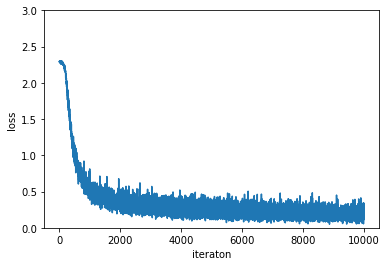

1000번 반복


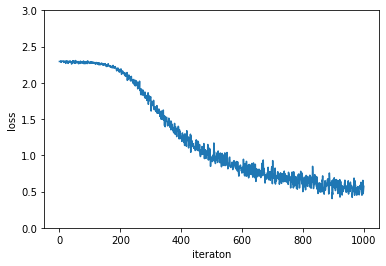

In [130]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
    
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수 설정
train_size = x_train.shape[0] # 훈련 데이터 크기
batch_size = 100   # 미니배치 크기
learning_rate = 0.1 # 학습률 설정

train_loss_list = [] 

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    # grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
        
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)       
        
# 그래프 그리기
print("10000번 반복")
x = np.arange(iters_num)
plt.plot(x, train_loss_list)
plt.xlabel("iteraton")
plt.ylabel("loss")
plt.ylim(0, 3.0)
plt.show()

# ------------------------------------------------------------------------------

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 1000  # 반복 횟수 설정
train_size = x_train.shape[0] # 훈련 데이터 크기
batch_size = 100   # 미니배치 크기
learning_rate = 0.1 # 학습률 설정

train_loss_list = [] 

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    # grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
        
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)       
        
# 그래프 그리기
print("1000번 반복")
x = np.arange(iters_num)
plt.plot(x, train_loss_list)
plt.xlabel("iteraton")
plt.ylabel("loss")
plt.ylim(0, 3.0)
plt.show()

위의 그래프와 같이 반복 횟수가 많아지면 손실 함수 값이 빠르게 작아진다.

### 5.3. 시험 데이터로 평가

train acc, test acc | 0.09871666666666666, 0.098
train acc, test acc | 0.8042333333333334, 0.8067
train acc, test acc | 0.87665, 0.88
train acc, test acc | 0.89915, 0.9012
train acc, test acc | 0.90685, 0.9104
train acc, test acc | 0.9146, 0.9159
train acc, test acc | 0.9196833333333333, 0.9224
train acc, test acc | 0.9237666666666666, 0.9262
train acc, test acc | 0.9282666666666667, 0.9308
train acc, test acc | 0.93155, 0.9338
train acc, test acc | 0.93405, 0.9347
train acc, test acc | 0.9372, 0.9363
train acc, test acc | 0.9396333333333333, 0.9398
train acc, test acc | 0.9419333333333333, 0.9429
train acc, test acc | 0.94445, 0.9432
train acc, test acc | 0.9463833333333334, 0.9444
train acc, test acc | 0.9472166666666667, 0.9467


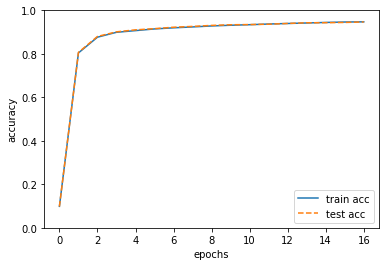

In [107]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
    
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수 설정
train_size = x_train.shape[0] # 훈련 데이터 크기
batch_size = 100   # 미니배치 크기
learning_rate = 0.1 # 학습률 설정

train_loss_list = [] 
train_acc_list = []
test_acc_list = []

# 1에폭 당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    # grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
        
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))   
        
        
# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

**에폭**은 학습에서 훈련 데이터를 모두 소진했을 때의 횟수에 해당한다. 즉 10000개의 데이터를 100개의 미니배치로 학습할 경우 경사 하강법을 100회 반복하면 모든 훈련 데이터를 소진한 상태가 되어 100회가 1에폭이 된다.